<a href="https://colab.research.google.com/github/abel2901/AppTrabalho2/blob/master/movieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as notas dos filmes no geral


# New Section

In [ ]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId", "notas", "momentos"]
notas.head()

,usuarioId,filmeId,notas,momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas["notas"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: notas, Length: 100836, dtype: float64

In [ ]:
notas["notas"].mean()

3.501556983616962

In [ ]:
notas.notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

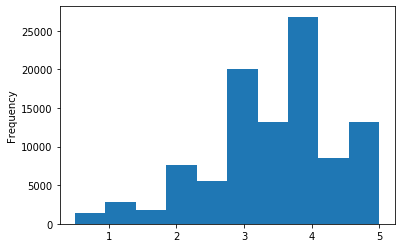

In [ ]:
notas.notas.plot(kind="hist")

In [ ]:
notas.notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

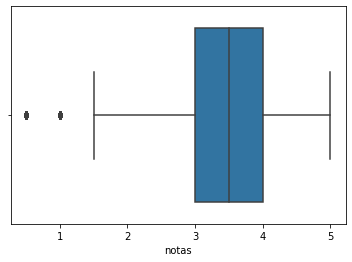

In [ ]:
import seaborn as sns
sns.boxplot(notas.notas)

# Analisando filmes no geral


In [ ]:
import pandas as pd
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,notas,momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando algumas notas específicas por filme


In [ ]:
notas.query("filmeId==1").notas.mean()

3.9209302325581397

In [ ]:
medias_por_filmes = notas.groupby("filmeId").mean()["notas"]
medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

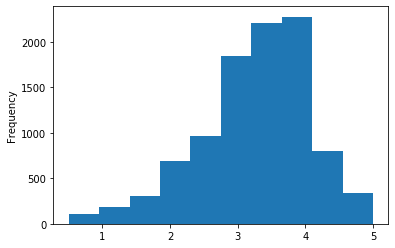

In [ ]:
medias_por_filmes.plot(kind='hist')

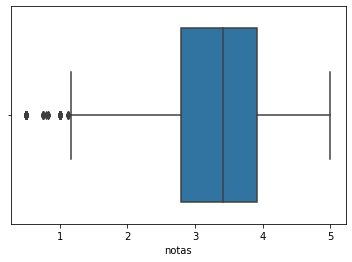

In [ ]:
sns.boxplot(medias_por_filmes)

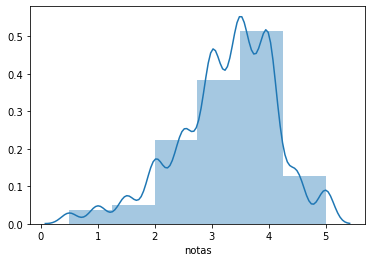

In [ ]:
sns.distplot(medias_por_filmes, bins=6)

Text(0.5, 1.0, 'Histograma da media dos filmes')

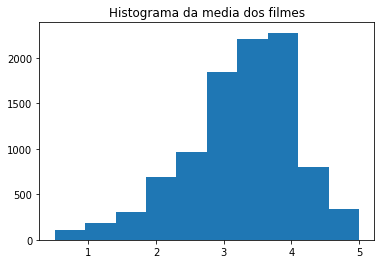

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)
plt.title("Histograma da media dos filmes")

#Analisando dados dos idiomas dos filmes 


In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


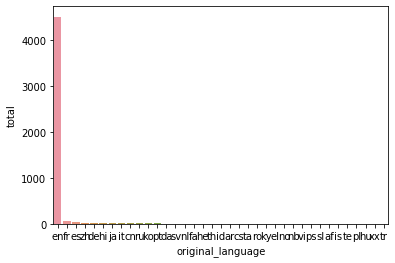

In [ ]:
import seaborn as sns
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)


In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)


4505 298


In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [ ]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


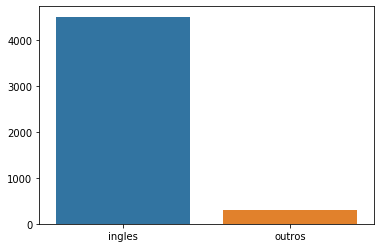

In [ ]:
sns.barplot(x="lingua", y = "total", data = dados)

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ar     2
ro     2
ta     2
cs     2
id     2
pl     1
is     1
tr     1
xx     1
nb     1
sl     1
hu     1
no     1
ps     1
ky     1
af     1
te     1
vi     1
el     1
Name: original_language, dtype: int64

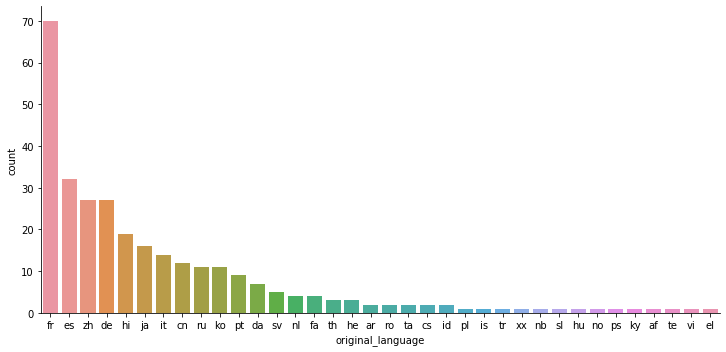

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect=2, order=total_por_lingua_de_outros_filmes.index)

# Revisando média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
print("Nota media do Toy Story %.2f" % notas_do_toy_story.notas.mean())
print("Nota media do Jumanji %.2f" % notas_do_jumanji.notas.mean())

Nota media do Toy Story 3.92
Nota media do Jumanji 3.43


In [ ]:
print("Nota media do Toy Story %.2f" % notas_do_toy_story.notas.median())
print("Nota media do Jumanji %.2f" % notas_do_jumanji.notas.median())

Nota media do Toy Story 4.00
Nota media do Jumanji 3.50


{'boxes': [<matplotlib.lines.Line2D at 0x7ff7ff1f6208>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7ff1edda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7febf4e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff7febf4ac8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff7ff062550>,
  <matplotlib.lines.Line2D at 0x7ff7fec0b828>]}

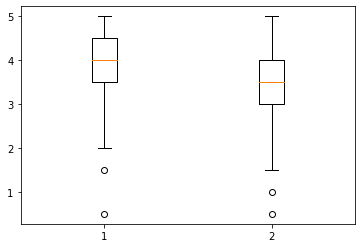

In [ ]:
plt.boxplot([notas_do_toy_story.notas, notas_do_jumanji.notas])

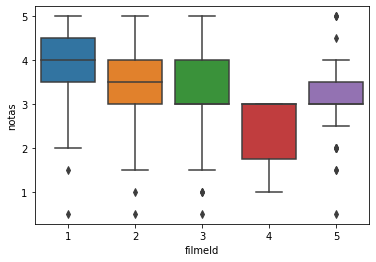

In [ ]:
sns.boxplot(x = "filmeId", y = "notas", data = notas.query("filmeId in [1,2,3,4,5]"))

In [ ]:
print(notas_do_jumanji.notas.std(), notas_do_toy_story.notas.std())

0.8817134921476455 0.8348591407114045
